<a href="https://colab.research.google.com/github/LAGISHETTYNANDITHA/Data-analysis-using-python/blob/main/dataanalysis_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
file_path = "earthquakes_2023_global.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Convert 'time' and 'updated' columns to datetime format
df["time"] = pd.to_datetime(df["time"])
df["updated"] = pd.to_datetime(df["updated"])

# Remove duplicate rows
df = df.drop_duplicates()

# Fill missing values for numerical columns with median
num_cols = ["nst", "gap", "dmin", "horizontalError", "magError", "magNst"]
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing values for categorical columns with mode
cat_cols = ["place"]
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Save the preprocessed dataset
df.to_csv("earthquakes_2023_global_cleaned.csv", index=False)

# Display final shape and missing values count
print("Preprocessing Completed!")
print(f"Dataset Shape: {df.shape}")
print("Missing Values:\n", df.isnull().sum())


<ipython-input-1-19b15e13a2e7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())
<ipython-input-1-19b15e13a2e7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])


Preprocessing Completed!
Dataset Shape: (24682, 22)
Missing Values:
 time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64


In [2]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,24682.000000,24682.000000,24682.000000,24682.000000,24682.000000,24682.000000,24682.000000,24682.000000,24682.000000,24682.000000,24682.000000,24682.000000
mean,18.000904,-15.671720,66.877188,3.968277,41.691881,125.834151,2.494053,0.573581,6.873913,4.481239,0.122339,32.151365
std,30.313018,129.920068,115.838429,0.812665,37.383520,67.107314,3.742791,0.257568,3.982248,4.555586,0.102016,47.194951
min,-65.849700,-179.998700,-3.370000,2.600000,0.000000,8.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,-5.919050,-150.986900,10.000000,3.180000,19.000000,75.000000,0.628000,0.400000,4.140000,1.840000,0.082000,11.000000
50%,19.173416,-66.165183,22.000000,4.200000,29.000000,112.000000,1.490500,0.580000,6.910000,2.017000,0.111000,18.000000
75%,43.810825,126.823975,66.335750,4.500000,50.000000,165.000000,2.931000,0.740000,9.410000,6.662750,0.148000,33.000000
max,86.593900,179.999400,681.238000,7.800000,423.000000,350.000000,50.820000,1.880000,99.000000,60.670000,4.490000,884.000000


In [3]:
from sklearn.preprocessing import LabelEncoder


# Extract numerical vectors
latitude_vector = df["latitude"].values  # Vector for latitude
longitude_vector = df["longitude"].values  # Vector for longitude
depth_vector = df["depth"].values  # Vector for depth
magnitude_vector = df["mag"].values  # Vector for magnitude

# Encode categorical variables as factors (numerical values)
categorical_cols = ["magType", "type", "status"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categories to numerical values
    label_encoders[col] = le  # Store label encoders for future use

# Create a feature matrix (numerical + encoded categorical features)
feature_columns = ["latitude", "longitude", "depth", "mag", "magType", "type", "status"]
feature_matrix = df[feature_columns].values  # Convert to NumPy matrix

# Display results
print("Latitude Vector:", latitude_vector[:5])
print("Longitude Vector:", longitude_vector[:5])
print("Depth Vector:", depth_vector[:5])
print("Magnitude Vector:", magnitude_vector[:5])
print("\nFeature Matrix Shape:", feature_matrix.shape)
print("First 5 Rows of Feature Matrix:\n", feature_matrix[:5])


Latitude Vector: [52.0999  7.1397 19.1631 -4.7803 53.3965]
Longitude Vector: [ 178.5218  126.738   -66.5251  102.7675 -166.9417]
Depth Vector: [82.77  79.194 24.    63.787 10.   ]
Magnitude Vector: [3.1  4.5  3.93 4.3  3.  ]

Feature Matrix Shape: (24682, 7)
First 5 Rows of Feature Matrix:
 [[  52.0999  178.5218   82.77      3.1       4.        1.        1.    ]
 [   7.1397  126.738    79.194     4.5       0.        1.        1.    ]
 [  19.1631  -66.5251   24.        3.93      2.        1.        1.    ]
 [  -4.7803  102.7675   63.787     4.3       0.        1.        1.    ]
 [  53.3965 -166.9417   10.        3.        4.        1.        1.    ]]


ValueError: num must be an integer with 1 <= num <= 16, not 17

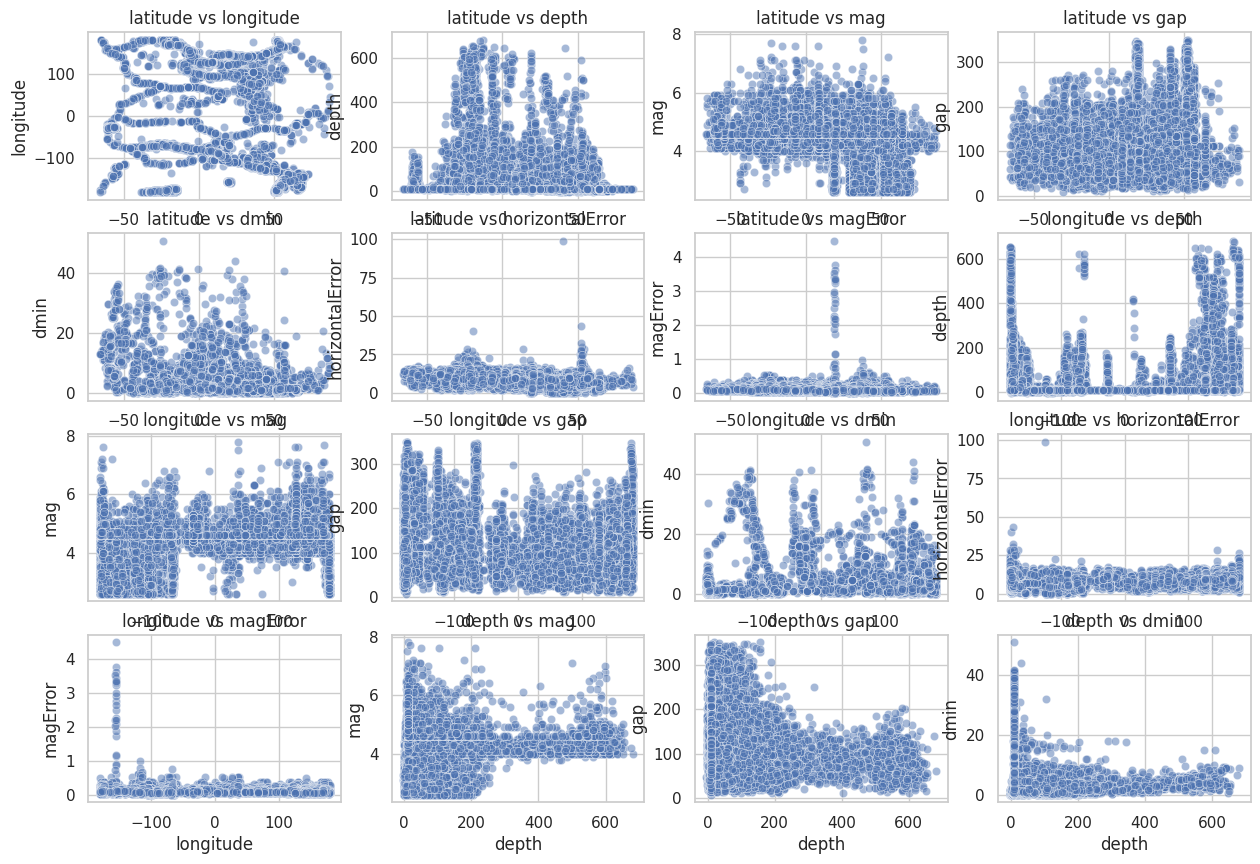

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Load the preprocessed dataset
file_path = "/content/earthquakes_2023_global_cleaned.csv"
df = pd.read_csv(file_path)

# Select numerical columns
numerical_columns = ["latitude", "longitude", "depth", "mag", "gap", "dmin", "horizontalError", "magError"]

# Generate scatter plots for all unique pairs of numerical features
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Create a grid of scatter plots
numplots = 1
for col1, col2 in itertools.combinations(numerical_columns, 2):
    plt.subplot(4, 4,numplots)
    sns.scatterplot(x=df[col1], y=df[col2], alpha=0.5)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f"{col1} vs {col2}")
    numplots += 1

plt.tight_layout()
plt.show()


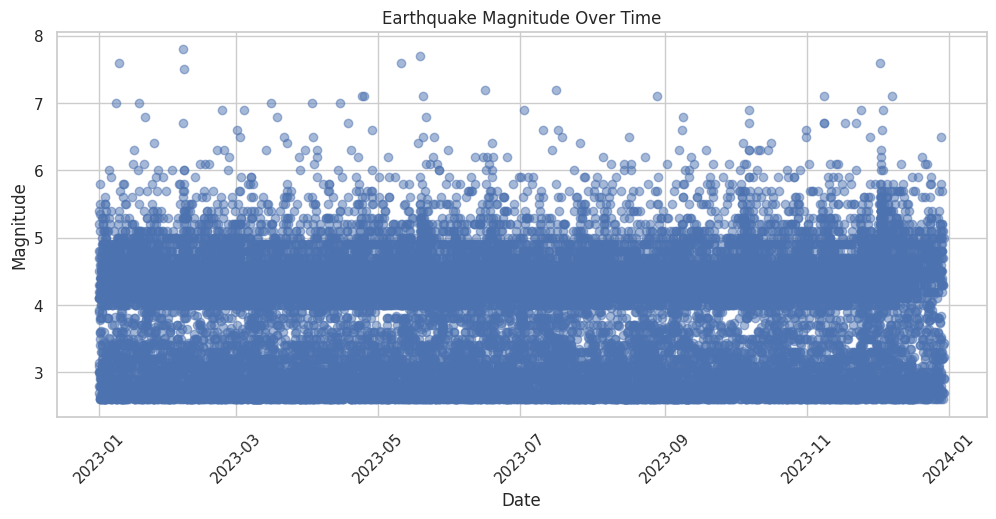

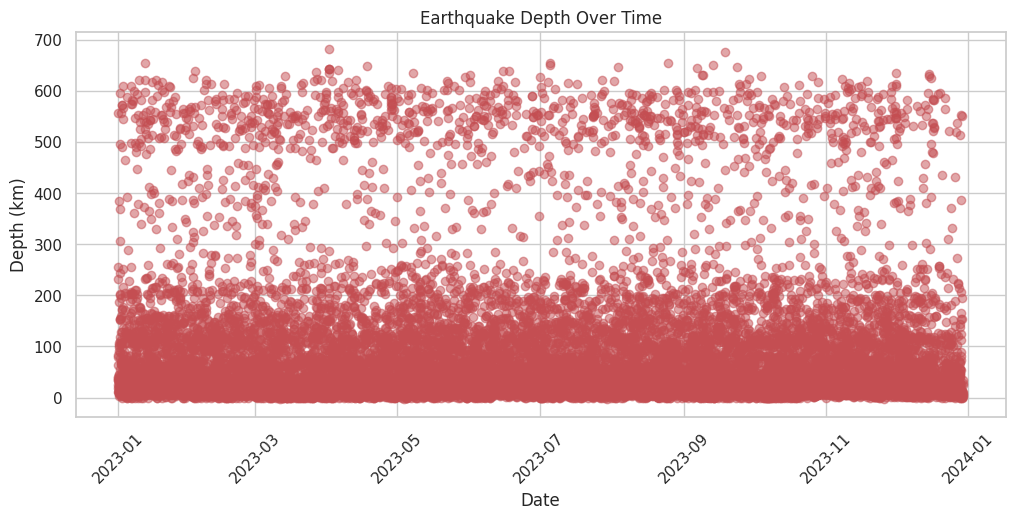

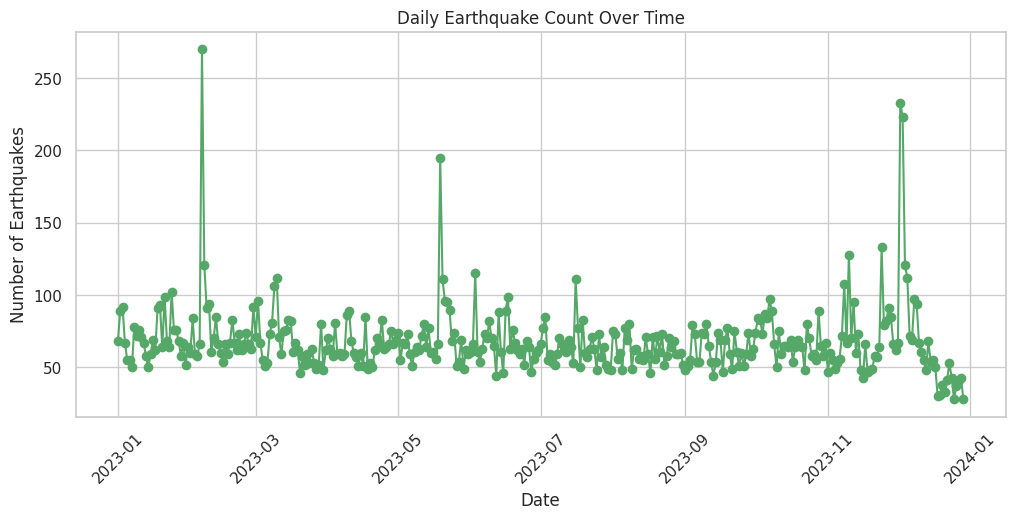

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed dataset
file_path = "/content/earthquakes_2023_global_cleaned.csv"
df = pd.read_csv(file_path)
df["time"] = pd.to_datetime(df["time"], errors="coerce")  # Converts invalid values to NaT
df = df.dropna(subset=["time"])  # Remove invalid (NaT) values


# Set 'time' as index
df.set_index("time", inplace=True)

# Plot: Magnitude over Time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["mag"], marker='o', linestyle='', alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Magnitude")
plt.title("Earthquake Magnitude Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot: Depth over Time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["depth"], marker='o', linestyle='', alpha=0.5, color='r')
plt.xlabel("Date")
plt.ylabel("Depth (km)")
plt.title("Earthquake Depth Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot: Number of Earthquakes per Day
df_daily = df.resample('D').size()  # Resample by day
plt.figure(figsize=(12, 5))
plt.plot(df_daily.index, df_daily.values, marker='o', linestyle='-', color='g')
plt.xlabel("Date")
plt.ylabel("Number of Earthquakes")
plt.title("Daily Earthquake Count Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


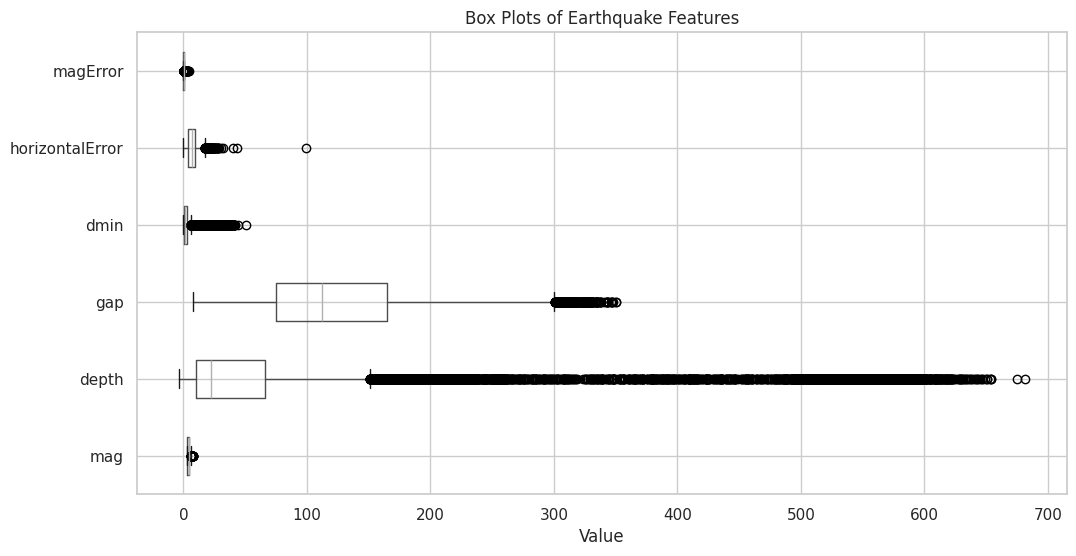

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/earthquakes_2023_global_cleaned.csv"
df = pd.read_csv(file_path)

# Select numerical columns for box plots
numerical_cols = ["mag", "depth", "gap", "dmin", "horizontalError", "magError"]

# Drop missing values in selected columns
df = df[numerical_cols].dropna()

# Set plot style
sns.set(style="whitegrid")

# Create box plots for each numerical feature
plt.figure(figsize=(12, 6))
df.boxplot(column=numerical_cols, vert=False)  # Horizontal box plot
plt.title("Box Plots of Earthquake Features")
plt.xlabel("Value")
plt.show()


Root Mean Squared Error (RMSE): 0.6241
R² Score: 0.4052


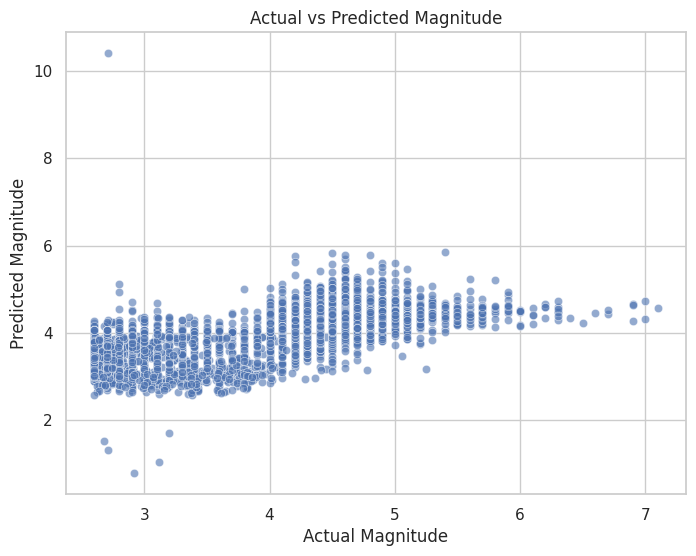

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = "/content/earthquakes_2023_global_cleaned.csv"
df = pd.read_csv(file_path)

# Select relevant numerical and categorical features
features = ["depth", "gap", "dmin", "horizontalError", "magError"]
target = "mag"  # Predicting earthquake magnitude

# Drop missing values
df = df[features + [target]].dropna()

# Split data into input (X) and output (y)
X = df[features]
y = df[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Actual vs Predicted Magnitude")
plt.grid(True)
plt.show()


Root Mean Squared Error (RMSE): 0.4659
R² Score: 0.6685


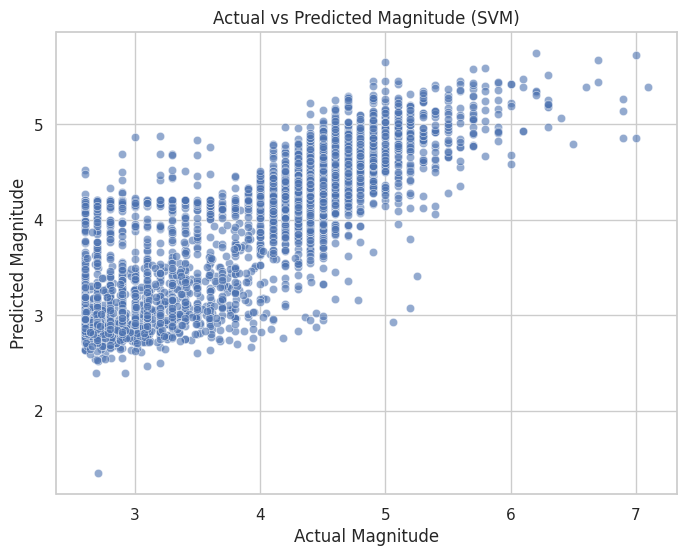

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = "/content/earthquakes_2023_global_cleaned.csv"
df = pd.read_csv(file_path)

# Select relevant numerical features
features = ["depth", "gap", "dmin", "horizontalError", "magError"]
target = "mag"  # Predicting earthquake magnitude

# Drop missing values
df = df[features + [target]].dropna()

# Split data into input (X) and output (y)
X = df[features]
y = df[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Support Vector Regression model
svr_model = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)  # Using RBF kernel
svr_model.fit(X_train, y_train)

# Predictions
y_pred = svr_model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Actual vs Predicted Magnitude (SVM)")
plt.grid(True)
plt.show()


Model Accuracy: 0.8920

Confusion Matrix:
 [[   0    0   32]
 [   0 1380  405]
 [   0   96 3024]]

Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        32
         Low       0.93      0.77      0.85      1785
    Moderate       0.87      0.97      0.92      3120

    accuracy                           0.89      4937
   macro avg       0.60      0.58      0.59      4937
weighted avg       0.89      0.89      0.89      4937



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


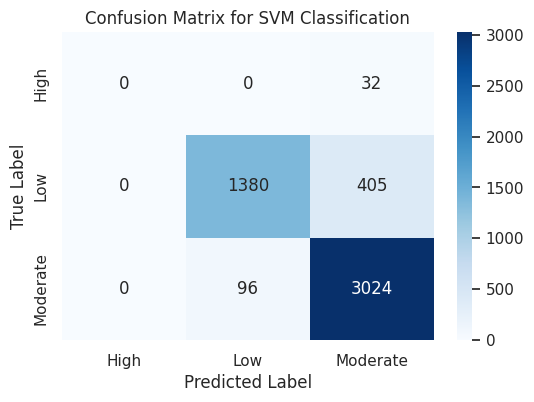

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
file_path = "/content/earthquakes_2023_global_cleaned.csv"
df = pd.read_csv(file_path)

# Select numerical features
features = ["depth", "gap", "dmin", "horizontalError", "magError"]
target = "mag"

# Drop missing values
df = df[features + [target]].dropna()

# Convert earthquake magnitude into categories
def categorize_magnitude(mag):
    if mag < 4.0:
        return "Low"
    elif 4.0 <= mag < 6.0:
        return "Moderate"
    else:
        return "High"

df["mag_category"] = df["mag"].apply(categorize_magnitude)

# Encode categories (Low=0, Moderate=1, High=2)
label_encoder = LabelEncoder()
df["mag_category"] = label_encoder.fit_transform(df["mag_category"])

# Define input (X) and output (y)
X = df[features]
y = df["mag_category"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Support Vector Classification model
svc_model = SVC(kernel="rbf", C=1, gamma="scale")
svc_model.fit(X_train, y_train)

# Predictions
y_pred = svc_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print results
print(f"Model Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM Classification")
plt.show()


Logistic Regression Accuracy: 0.8430
Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.03      0.06        32
         Low       0.81      0.77      0.79      1785
    Moderate       0.86      0.90      0.88      3120

    accuracy                           0.84      4937
   macro avg       0.89      0.56      0.57      4937
weighted avg       0.84      0.84      0.84      4937

--------------------------------------------------
Random Forest Accuracy: 0.9589
Classification Report:
               precision    recall  f1-score   support

        High       0.88      0.22      0.35        32
         Low       0.96      0.95      0.95      1785
    Moderate       0.96      0.97      0.97      3120

    accuracy                           0.96      4937
   macro avg       0.93      0.71      0.76      4937
weighted avg       0.96      0.96      0.96      4937

--------------------------------------------------
K-Nearest Neighbors 

<ipython-input-12-c2c9b7ab5643>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


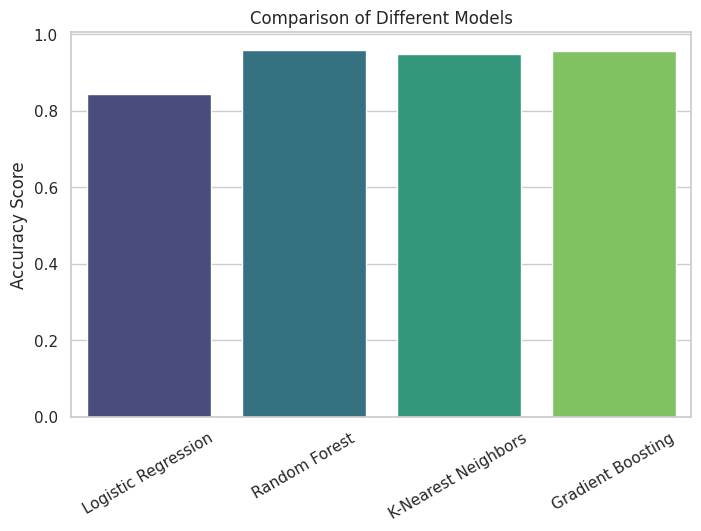

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
file_path = "/content/earthquakes_2023_global_cleaned.csv"
df = pd.read_csv(file_path)

# Select numerical features
features = ["depth", "gap", "dmin", "horizontalError", "magError"]
target = "mag"

# Drop missing values
df = df[features + [target]].dropna()

# Convert earthquake magnitude into categories
def categorize_magnitude(mag):
    if mag < 4.0:
        return "Low"
    elif 4.0 <= mag < 6.0:
        return "Moderate"
    else:
        return "High"

df["mag_category"] = df["mag"].apply(categorize_magnitude)

# Encode categories (Low=0, Moderate=1, High=2)
label_encoder = LabelEncoder()
df["mag_category"] = label_encoder.fit_transform(df["mag_category"])

# Define input (X) and output (y)
X = df[features]
y = df["mag_category"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("-" * 50)

# Plot model accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Different Models")
plt.xticks(rotation=30)
plt.show()


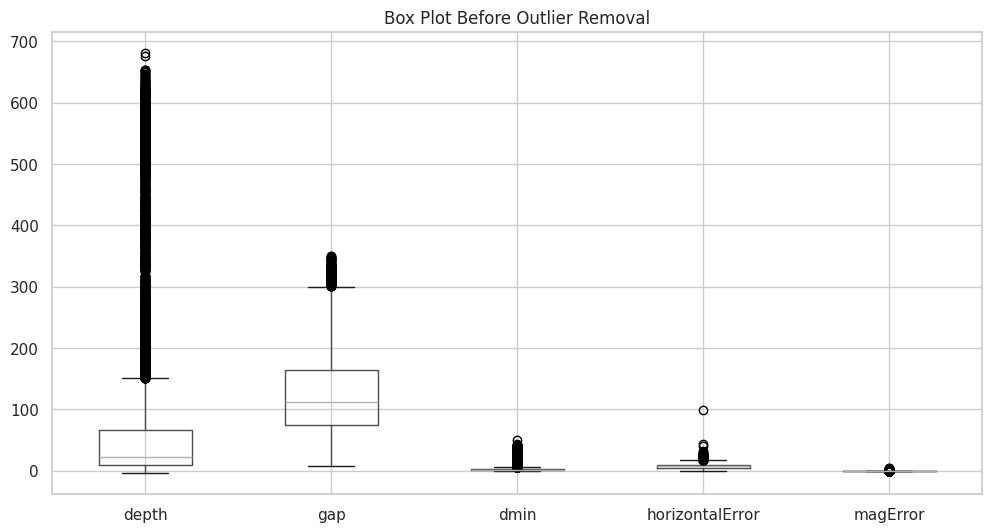

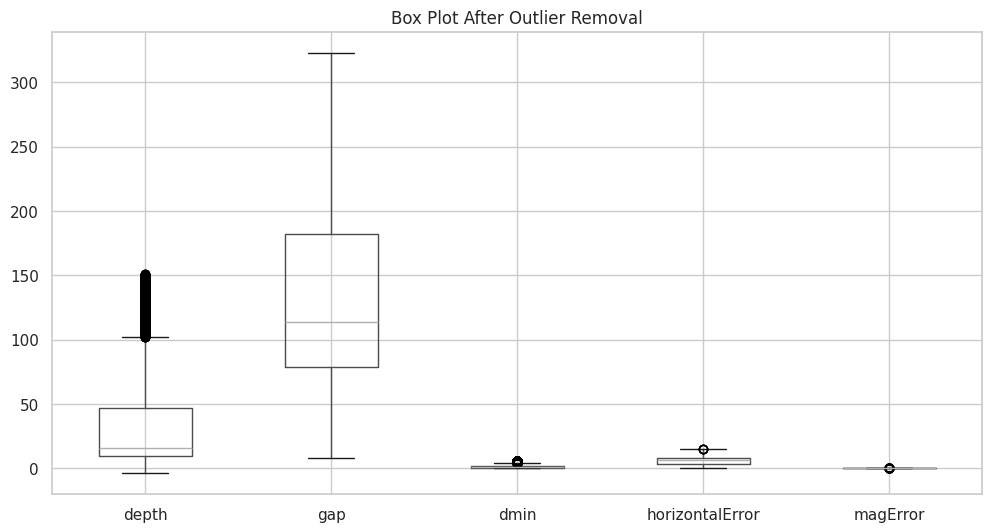

Original dataset shape: (24682, 22)
Cleaned dataset shape: (19181, 22)


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/earthquakes_2023_global_cleaned.csv"
df = pd.read_csv(file_path)

# Select numerical features for outlier removal
numerical_cols = ["depth", "gap", "dmin", "horizontalError", "magError"]

# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Plot boxplots before removing outliers
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot()
plt.title("Box Plot Before Outlier Removal")
plt.show()

# Remove outliers
df_cleaned = remove_outliers(df, numerical_cols)

# Plot boxplots after removing outliers
plt.figure(figsize=(12, 6))
df_cleaned[numerical_cols].boxplot()
plt.title("Box Plot After Outlier Removal")
plt.show()

# Print dataset shape before and after outlier removal
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")


Logistic Regression Accuracy: 0.8236
Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        20
         Low       0.83      0.77      0.80      1717
    Moderate       0.82      0.87      0.84      2100

    accuracy                           0.82      3837
   macro avg       0.55      0.55      0.55      3837
weighted avg       0.82      0.82      0.82      3837

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.9531
Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        20
         Low       0.95      0.95      0.95      1717
    Moderate       0.95      0.96      0.96      2100

    accuracy                           0.95      3837
   macro avg       0.64      0.64      0.64      3837
weighted avg       0.95      0.95      0.95      3837

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K-Nearest Neighbors Accuracy: 0.9484
Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        20
         Low       0.95      0.95      0.95      1717
    Moderate       0.95      0.96      0.95      2100

    accuracy                           0.95      3837
   macro avg       0.63      0.64      0.63      3837
weighted avg       0.94      0.95      0.95      3837

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Accuracy: 0.9494
Classification Report:
               precision    recall  f1-score   support

        High       0.33      0.10      0.15        20
         Low       0.95      0.95      0.95      1717
    Moderate       0.95      0.96      0.95      2100

    accuracy                           0.95      3837
   macro avg       0.74      0.67      0.69      3837
weighted avg       0.95      0.95      0.95      3837

--------------------------------------------------


<ipython-input-16-ed9de48da36a>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


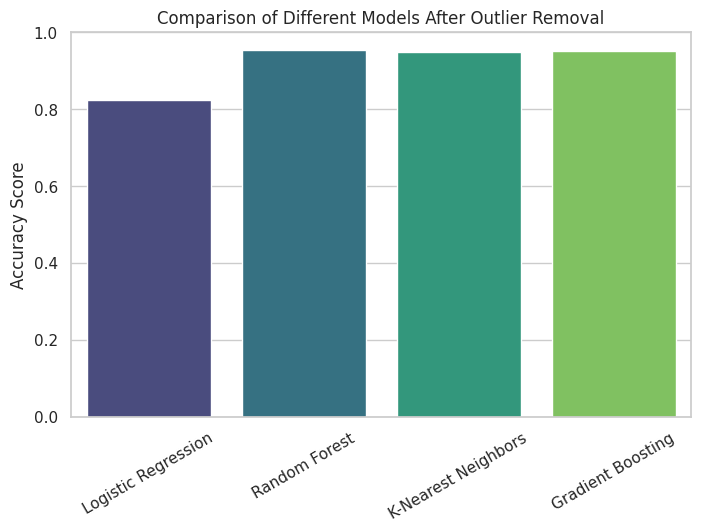

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define features and target
features = ["depth", "gap", "dmin", "horizontalError", "magError"]
target = "mag"

# Drop missing values
df_cleaned = df_cleaned[features + [target]].dropna()

# Convert earthquake magnitude into categories
def categorize_magnitude(mag):
    if mag < 4.0:
        return "Low"
    elif 4.0 <= mag < 6.0:
        return "Moderate"
    else:
        return "High"

df_cleaned["mag_category"] = df_cleaned["mag"].apply(categorize_magnitude)

# Encode categories (Low=0, Moderate=1, High=2)
label_encoder = LabelEncoder()
df_cleaned["mag_category"] = label_encoder.fit_transform(df_cleaned["mag_category"])

# Define input (X) and output (y)
X = df_cleaned[features]
y = df_cleaned["mag_category"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("-" * 50)

# Plot model accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Different Models After Outlier Removal")
plt.xticks(rotation=30)
plt.show()
